CLUSTERING
1. K-means

In [6]:
#Import Library
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd

In [7]:
np.random.seed()

In [8]:
x,y = make_blobs(n_samples=5000,centers=[[4,4],[2,1],[2,-3],[11,1]],cluster_std=0.9)

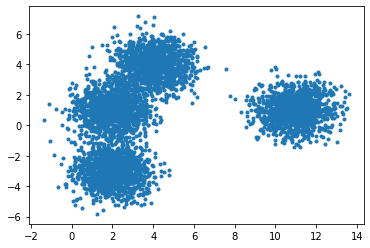

In [9]:
plt.scatter(x[:,0],x[:,1],marker='.')
plt.show()

Using Real Data from : https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

In [10]:
df =pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [11]:
df_drop = df.drop('Address',axis=1)


In [12]:
df_drop.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [13]:
from sklearn.preprocessing import StandardScaler
X = df_drop.values[:,1:]
X = np.nan_to_num(X)
clust_dataSet = StandardScaler().fit_transform(X)
clust_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [14]:
#Buat Variable dahulu
clusterNum = 3
k_means = KMeans(n_clusters=clusterNum, init='k-means++', n_init=10)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

In [15]:
df_drop["Cluster"] = labels
df_drop.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [16]:
#Grouping
df_drop.groupby('Cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


lihat Distribusi berdasarkan Umur dan Pendapatan

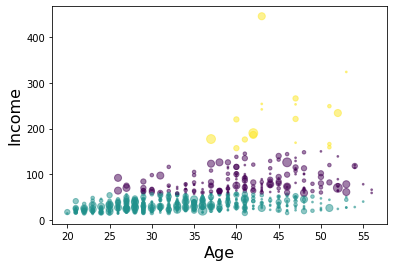

In [17]:
area = np.pi * (X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.show()

2. Hierarchial clustering

Sumber Data : https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

In [18]:
nameFile = "cars_clus.csv"

#Baca Dataframe

dataHC = pd.read_csv(nameFile)

# Banyak Baris dan Kolom
print("Banyak (baris, kolom): ", dataHC.shape)
dataHC.head()

Banyak (baris, kolom):  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


membersihkan data

In [19]:
print("Banyaknya data sebelum di bersihkan: ", dataHC.size)
dataHC[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']] = dataHC[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']].apply(pd.to_numeric, errors='coerce')
dataHC = dataHC.dropna()
dataHC = dataHC.reset_index(drop=True)
print("Banyaknya data sebelum di bersihkan: ", dataHC.size)

Banyaknya data sebelum di bersihkan:  2544
Banyaknya data sebelum di bersihkan:  1872


In [20]:
fiture = dataHC[['engine_s','width','length','fuel_cap','mpg']]
# fiture.head()

In [21]:
from sklearn.preprocessing import MinMaxScaler
x = fiture.values #returns a numpy array
min_max_scaler = MinMaxScaler()
fiture_minmax = min_max_scaler.fit_transform(x)
fiture_minmax[:5]

array([[0.11428571, 0.28143713, 0.30625832, 0.13364055, 0.43333333],
       [0.31428571, 0.46107784, 0.5792277 , 0.31797235, 0.33333333],
       [0.35714286, 0.52694611, 0.62849534, 0.35483871, 0.23333333],
       [0.11428571, 0.33532934, 0.38082557, 0.28110599, 0.4       ],
       [0.25714286, 0.80838323, 0.56724368, 0.37788018, 0.23333333]])

import scipy

In [22]:
import scipy
leng = fiture_minmax.shape[0]
D = np.zeros([leng,leng])

for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(fiture_minmax[i],fiture_minmax[j])

In [23]:
#Import Python Library
import pylab
import scipy.cluster.hierarchy as sch
z = sch.linkage(D, method = 'complete')

C:\Users\My Windows\AppData\Local\Temp\ipykernel_9772\1606632221.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = sch.linkage(D, method = 'complete')


In [24]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(z, max_d, criterion='distance')
clusters

array([6, 3, 3, 5, 4, 4, 5, 3, 3, 3, 4, 3, 4, 4, 3, 5, 5, 3, 3, 3, 4, 6,
       7, 5, 5, 4, 5, 4, 5, 5, 5, 2, 2, 2, 2, 4, 4, 6, 3, 5, 3, 1, 3, 1,
       1, 3, 2, 6, 5, 5, 3, 4, 6, 5, 5, 3, 6, 5, 3, 3, 3, 4, 4, 1, 6, 5,
       5, 3, 3, 4, 5, 5, 5, 3, 1, 3, 4, 5, 3, 4, 4, 6, 5, 3, 4, 3, 5, 4,
       5, 4, 5, 5, 4, 5, 5, 3, 3, 3, 5, 5, 5, 6, 6, 6, 6, 5, 3, 6, 5, 6,
       5, 1, 6, 5, 5, 6, 6], dtype=int32)

In [25]:
# Kembali Menggunakan FCluster
k = 3
clusters_new = fcluster(z, k, criterion='maxclust')
clusters_new

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

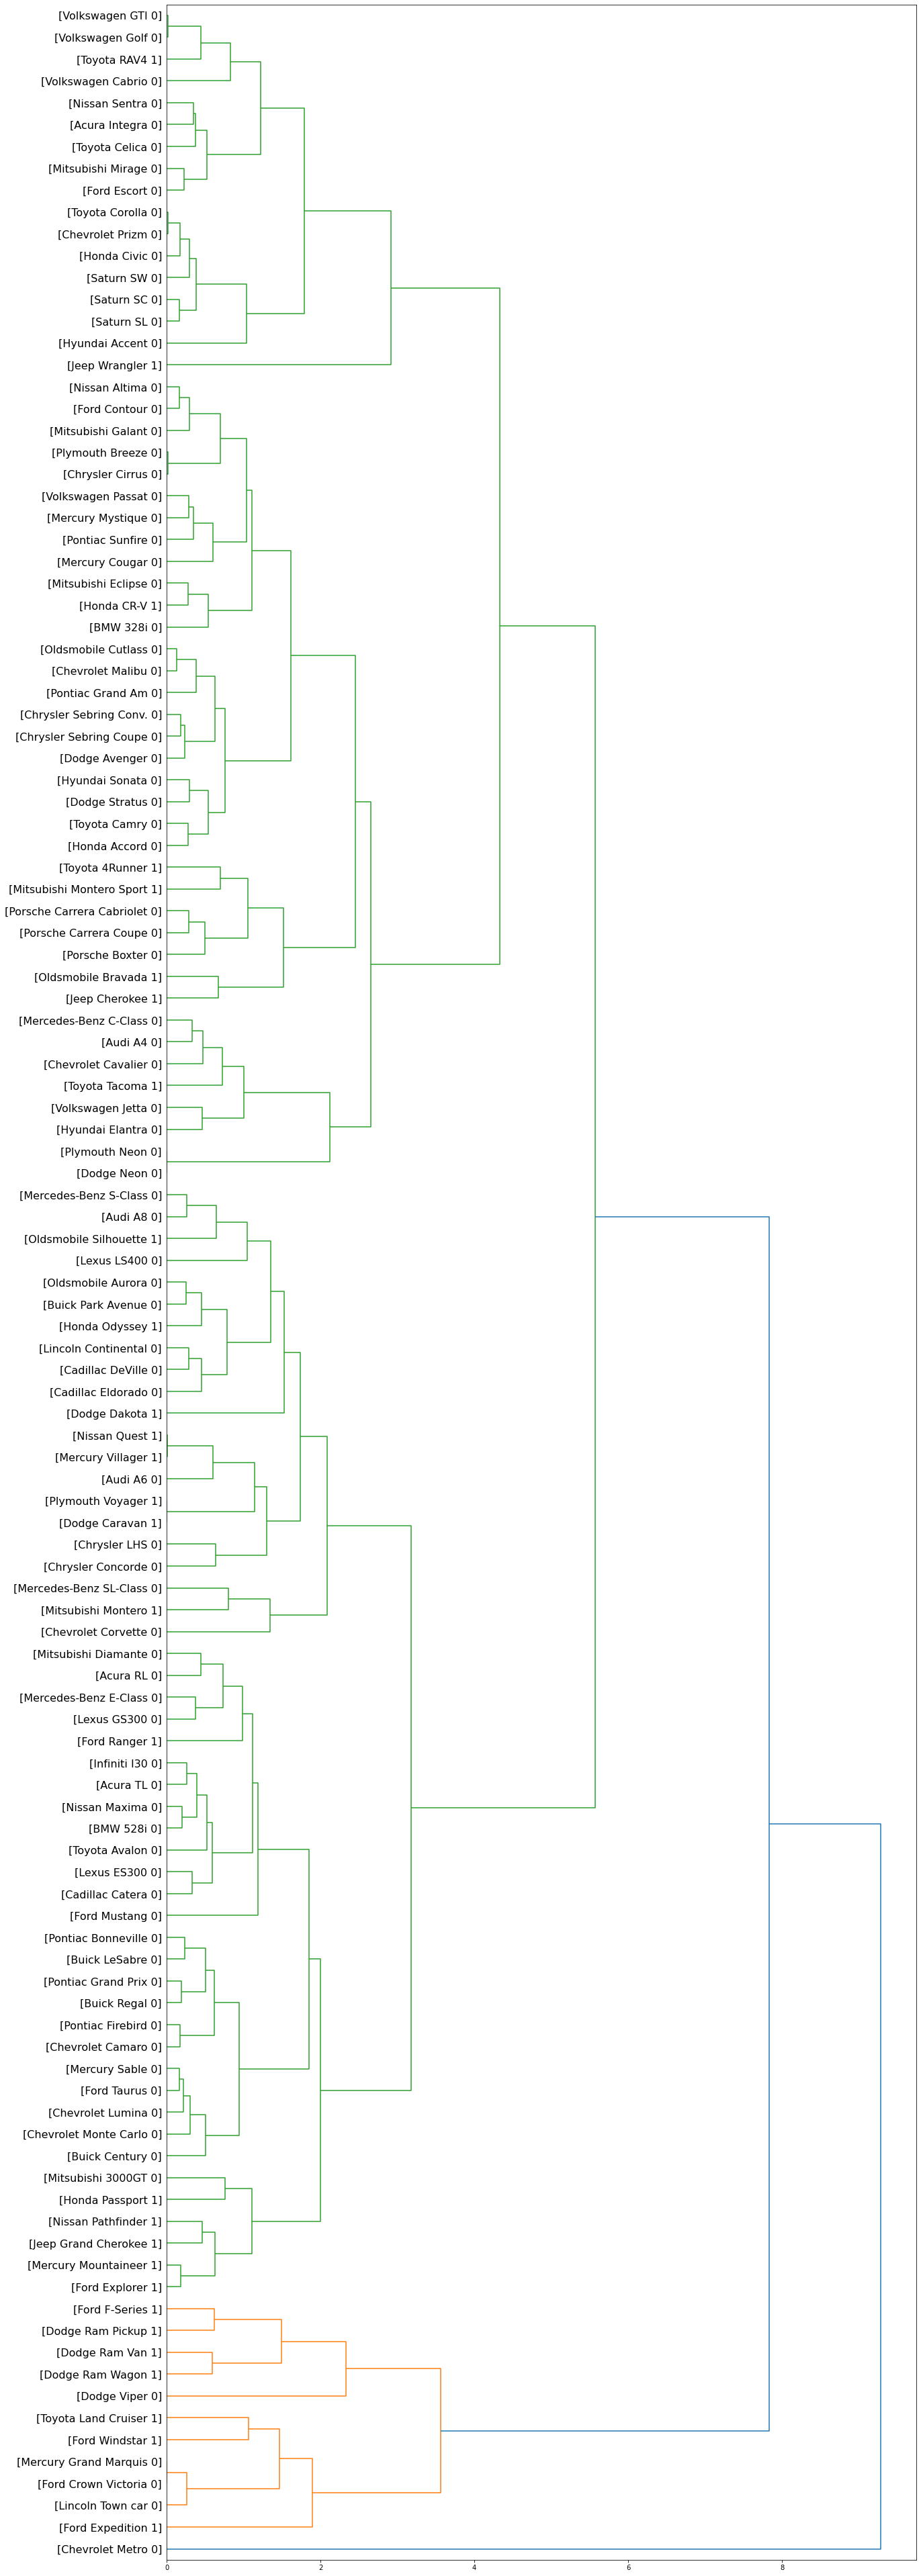

In [26]:
# Lihat Gambar 
gambar = pylab.figure(figsize=(20,70))
def llf(id):
    return '[%s %s %s]' % (dataHC['manufact'][id], dataHC['model'][id], int(float(dataHC['type'][id])))
gambar_dendro = sch.dendrogram(z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =16, labels = dataHC['model'], orientation = 'right')